# Neighborhood Case Studies 

Hello, Audrey here. Shinah and I are comparing five LA-Seoul neighborhood pairs, selected by population density, job density, commute mode, and transit ridership. 

In this Jupyter notebook, I will create functions to generate street grid maps and (attempt to) generate isochrone maps for each neighborhood pair we identified in cleanednotebook-2.  

Neighborhood pairs: 

| Criteria                     | Los Angeles | Seoul              |
|------------------------------|-------------|--------------------|
| Highest % Commute By Transit | Westlake    | Jungnim-dong       |
| Highest % Commute By Car     | Norwalk     | Suseo-dong         |
| Ridership                    | DTLA        | Yeoksam 1(il)-dong |
| Population Density           | Koreatown   | Jungang-dong       |
| Job Concentration            | Burbank     | Singil 3(sam)-dong |

## Map Street Grids

Importing the necessary libraries: 

In [2]:
import pandas as pd
# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

##### Create Dataframes for Neighborhood Pairs

Declare variables for each neighborhood. 

In [3]:
#COMMUTE MODE 

# Highest % commute by transit (except taxi)
s_transit = 'Sindang 5(o)-dong, Jung-gu, Seoul, 04578, South Korea'
l_transit =  'Westlake, Los Angeles, Los Angeles County, California, United States'
# Highest % commute by car
s_car = 'Geoyeo 1(il)-dong, Songpa-gu, Seoul, 05771, South Korea'
l_car = 'Norwalk, Los Angeles County, California, United States'


# RIDERSHIP 
# LRT station with the highest ridership 
s_lrt = 'Seocho-dong, Seocho-gu, Seoul, South Korea'
l_lrt = 'Downtown, Los Angeles, Los Angeles County, California, United States'
##what happens when point data is used? 

# BRT station with the highest ridership 
#s-brt =
#l-brt =


# DEMAND/NEED 
# Highest population density 
s_popdense = 'Jungang-dong, Seoul, South Korea'
l_popdense = 'Koreatown, Los Angeles, CA, USA'

# Highest job density
s_jobdense = 'Singil 3(sam)-dong, Yeongdeungpo-gu, Seoul, 07380, South Korea'
l_jobdense = 'Burbank, Los Angeles County, California, United States'

Create dataframes. place_df will be a list, and place_df_2 will be a table. 

Source: https://datatofish.com/create-pandas-dataframe/

In [4]:
from pandas import DataFrame

place_list = [ 
                  s_transit, l_transit, 
                  s_car, l_car, 
                  s_lrt, l_lrt, 
                 #s-brt, l-brt
                  s_popdense, l_popdense,
                  s_jobdense, l_popdense
                ]

place_df = DataFrame(place_list,columns=['Neighborhood Name'])
place_df

Neighborhood Name
0  Sindang 5(o)-dong, Jung-gu, Seoul, 04578, Sout...
1  Westlake, Los Angeles, Los Angeles County, Cal...
2  Geoyeo 1(il)-dong, Songpa-gu, Seoul, 05771, So...
3  Norwalk, Los Angeles County, California, Unite...
4         Seocho-dong, Seocho-gu, Seoul, South Korea
5  Downtown, Los Angeles, Los Angeles County, Cal...
6                   Jungang-dong, Seoul, South Korea
7                    Koreatown, Los Angeles, CA, USA
8  Singil 3(sam)-dong, Yeongdeungpo-gu, Seoul, 07...
9                    Koreatown, Los Angeles, CA, USA

In [5]:
places = {'Seoul': [s_transit, s_car, s_lrt, s_popdense, s_jobdense],
        'Los Angeles': [l_transit, l_car, l_lrt, l_popdense, l_jobdense]
        }
 
                
place_df_2 = pd.DataFrame(places, columns = ['Seoul','Los Angeles'], index=['Highest % Commute by Transit','Highest % Commute by Car','Highest Ridership','Population Dense', 'Job Dense'])
place_df_2 

Seoul  \
Highest % Commute by Transit  Sindang 5(o)-dong, Jung-gu, Seoul, 04578, Sout...   
Highest % Commute by Car      Geoyeo 1(il)-dong, Songpa-gu, Seoul, 05771, So...   
Highest Ridership                    Seocho-dong, Seocho-gu, Seoul, South Korea   
Population Dense                               Jungang-dong, Seoul, South Korea   
Job Dense                     Singil 3(sam)-dong, Yeongdeungpo-gu, Seoul, 07...   

                                                                    Los Angeles  
Highest % Commute by Transit  Westlake, Los Angeles, Los Angeles County, Cal...  
Highest % Commute by Car      Norwalk, Los Angeles County, California, Unite...  
Highest Ridership             Downtown, Los Angeles, Los Angeles County, Cal...  
Population Dense                                Koreatown, Los Angeles, CA, USA  
Job Dense                     Burbank, Los Angeles County, California, Unite...

##### Map Street Grid of all 10 Neighborhoods 

Create function to map the street grid of a neighorhood, given the place name and the network type. 

In [16]:
def streetgrid (place, networktype):  
    print("Street Grid of "+ place + " (network type: " + networktype + ")")
    
    # download neighborhood street network
    neighborhood = ox.graph_from_place(place, network_type = networktype) 
    
    # map the street grid 
    fig, ax = ox.plot_graph(neighborhood)
    ax.set_title("Test") #<--- this line isn't working? 
 

Create a for loop to map the street grid of all our neighborhoods: 

Street Grid of Sindang 5(o)-dong, Jung-gu, Seoul, 04578, South Korea (network type: walk)


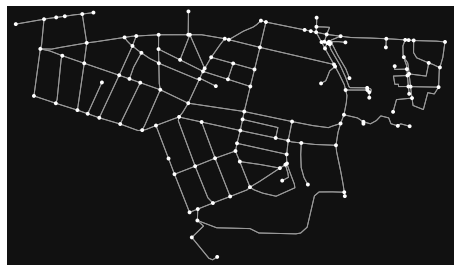

Street Grid of Westlake, Los Angeles, Los Angeles County, California, United States (network type: walk)


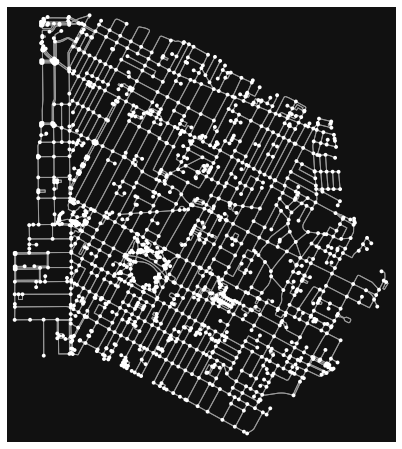

Street Grid of Geoyeo 1(il)-dong, Songpa-gu, Seoul, 05771, South Korea (network type: walk)


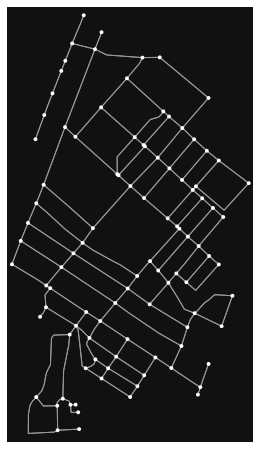

Street Grid of Norwalk, Los Angeles County, California, United States (network type: walk)


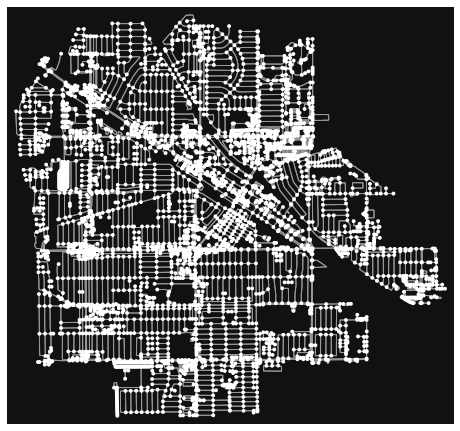

Street Grid of Seocho-dong, Seocho-gu, Seoul, South Korea (network type: walk)


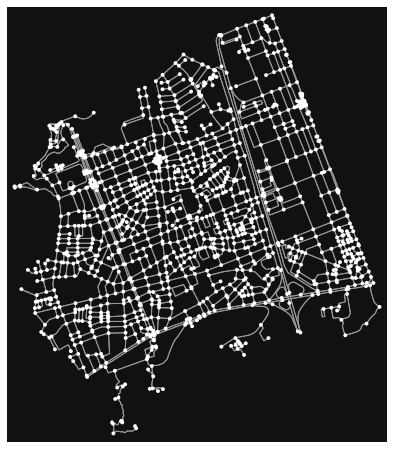

Street Grid of Downtown, Los Angeles, Los Angeles County, California, United States (network type: walk)


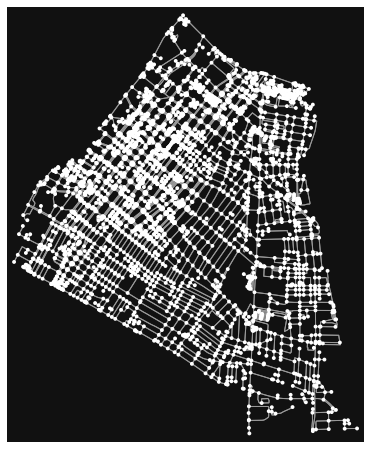

Street Grid of Jungang-dong, Seoul, South Korea (network type: walk)


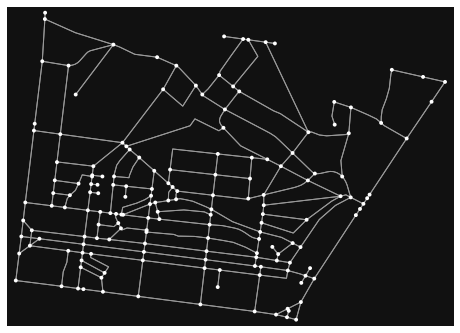

Street Grid of Koreatown, Los Angeles, CA, USA (network type: walk)


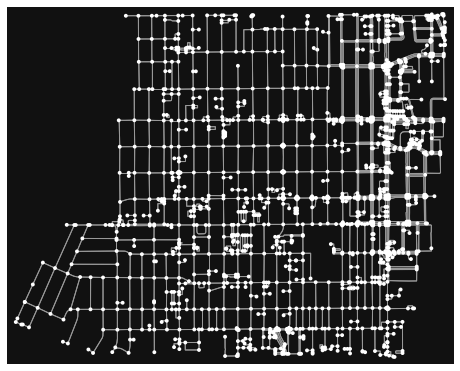

Street Grid of Singil 3(sam)-dong, Yeongdeungpo-gu, Seoul, 07380, South Korea (network type: walk)


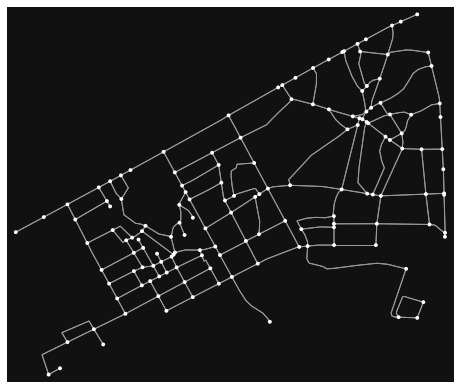

Street Grid of Koreatown, Los Angeles, CA, USA (network type: walk)


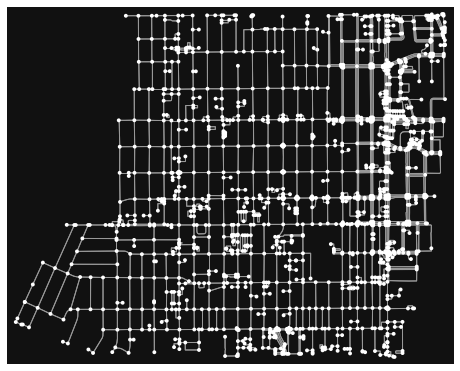

In [17]:
for index, row in place_df.iterrows():
    #name = place_df(row['Neighborhood Name']
    streetgrid(row['Neighborhood Name'], 'walk')

##### QUESTIONS: 

1. Not sure why the ax.set_title isn't working? For now I added a print() in the streetgrid function. 

2. Why does iterating my streetgrid function over place_df_2 return Koreatown twice? ;__;

3. In the hackathon cheat sheet, is the "for indicator in indicators" a different way of doing the same thing? 


## Nodes and Edges

##### Create Geodataframes

A function to iterate through a list and create node and edge gdfs, and show their heads:

In [22]:
def edge_node_gdf (place, networktype):      
    # download neighborhood street network
    neighborhood = ox.graph_from_place(place, network_type = networktype)
  
    # project downloaded network data to Web Mercator (measurements are in meters)
    neighborhood = ox.project_graph(neighborhood, to_crs='epsg:3857') 
    
    # convert nodes and edges to two separate geodataframes 
    neighborhood_node, neighborhood_edge = ox.graph_to_gdfs(neighborhood)
    
    #print("node df type: ")
    #return type(neighborhood_node)
    
    print("Nodes in "+ place + " (network type: " + networktype + ")")
    return neighborhood_node.head()
    
    #print("Edges in "+ place + " (network type: " + networktype + ")")
    #return neighborhood_edge.head() 

# Can only have one print or return 

In [23]:
edge_node_gdf(s_transit, 'walk')

Nodes in Sindang 5(o)-dong, Jung-gu, Seoul, 04578, South Korea (network type: walk)


y             x      osmid         lon        lat  \
436833099  4.518205e+06  1.413938e+07  436833099  127.016220  37.565350   
436840063  4.517934e+06  1.414027e+07  436840063  127.024167  37.563423   
436840064  4.517958e+06  1.414027e+07  436840064  127.024249  37.563592   
436864128  4.518177e+06  1.414023e+07  436864128  127.023827  37.565151   
436864130  4.518211e+06  1.414006e+07  436864130  127.022340  37.565390   

            highway                          geometry  
436833099       NaN  POINT (14139380.933 4518205.005)  
436840063       NaN  POINT (14140265.555 4517934.342)  
436840064       NaN  POINT (14140274.706 4517958.118)  
436864128  crossing  POINT (14140227.707 4518176.987)  
436864130       NaN  POINT (14140062.208 4518210.622)

##### Side by Side maps of Edge and Nodes in each Neighborhood 

Define function to take 1 place as parameter and return a side by side edge and node graph: 

In [24]:
def edge_node_map (place, networktype):   
    # download neighborhood street network
    neighborhood = ox.graph_from_place(place, network_type = networktype)
  
    # project downloaded network data to Web Mercator (measurements are in meters)
    neighborhood = ox.project_graph(neighborhood, to_crs='epsg:3857') 
    
    # convert nodes and edges to two separate geodataframes 
    neighborhood_node, neighborhood_edge = ox.graph_to_gdfs(neighborhood) 
    
    # create the 1x2 subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 12))
    # name each subplot
    ax1, ax2 = axs
    # Edge map on the left
    neighborhood_edge.plot(figsize =(10,10),
                      ax = ax1)  
    
    ax1.axis("off")
    ax1.set_title("Edges in "+ place + " (" +networktype + ")")

    # spatial lag map on the right
    neighborhood_node.plot(figsize =(10,10),
                     ax = ax2) 

    ax2.axis("off")
    ax2.set_title("Nodes in "+ place + "(" + networktype + ")")

Iterate through neighborhoods and create side by side edge and node maps for each: 

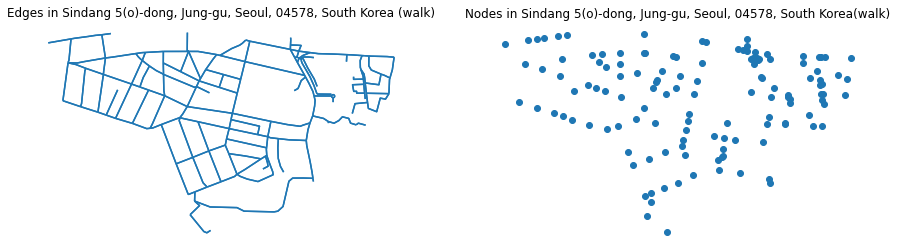

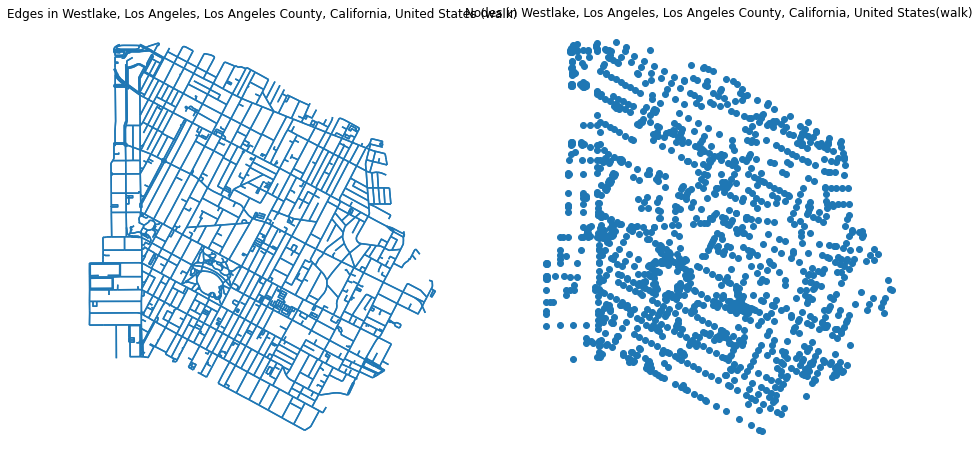

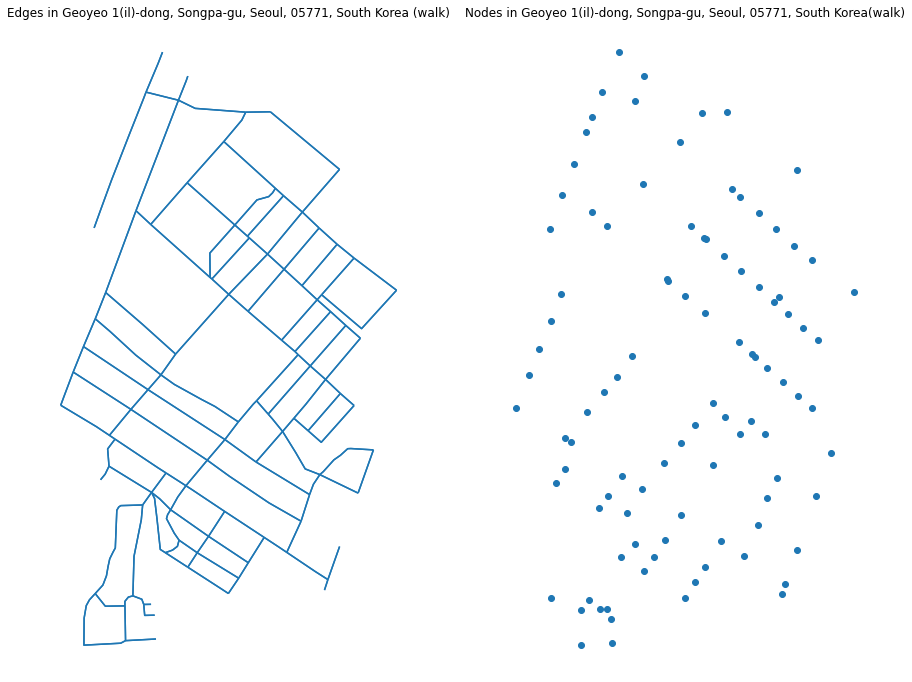

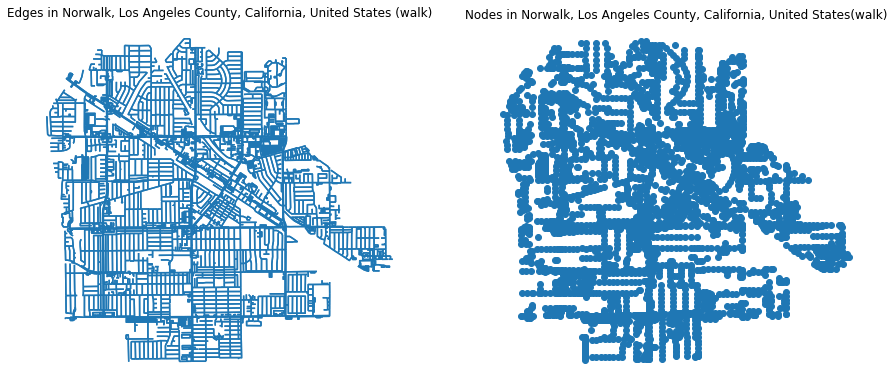

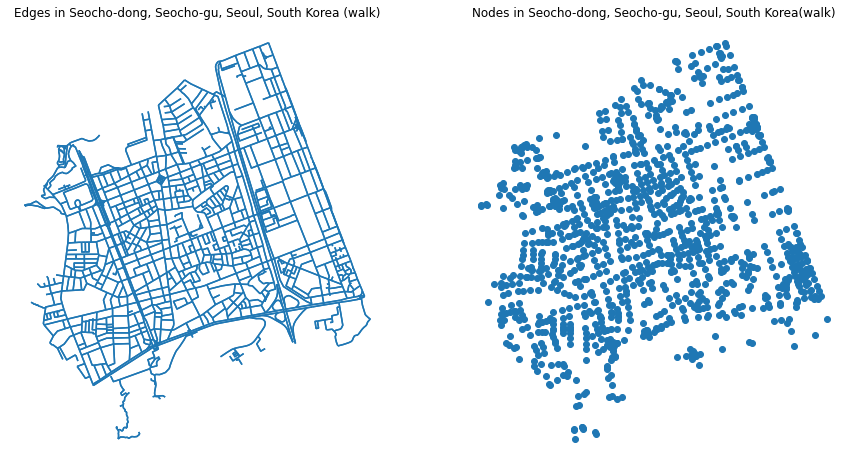

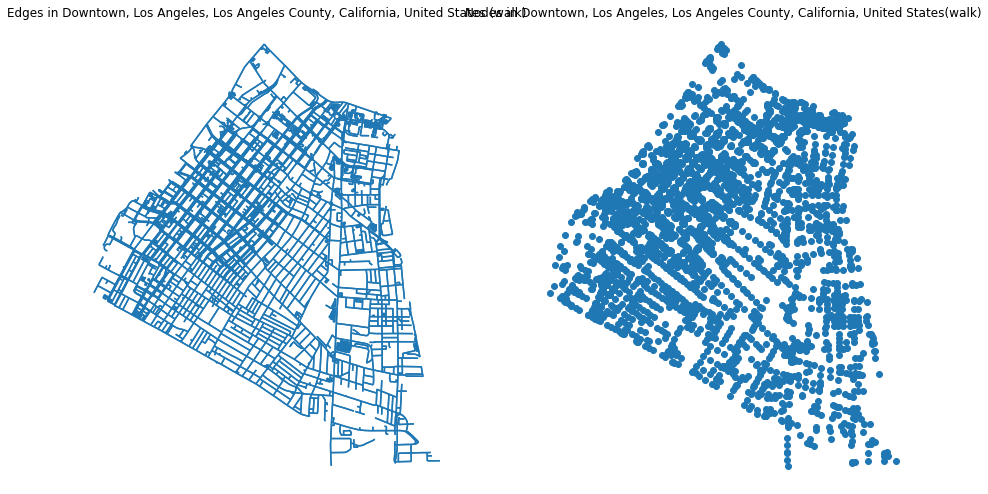

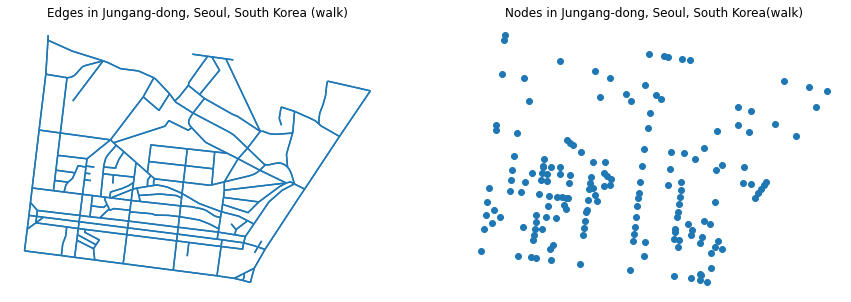

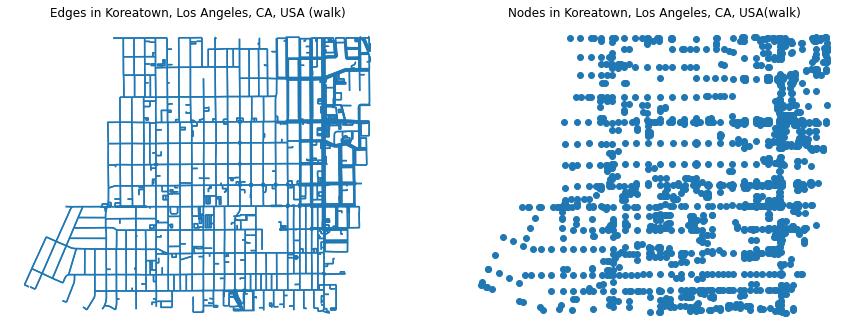

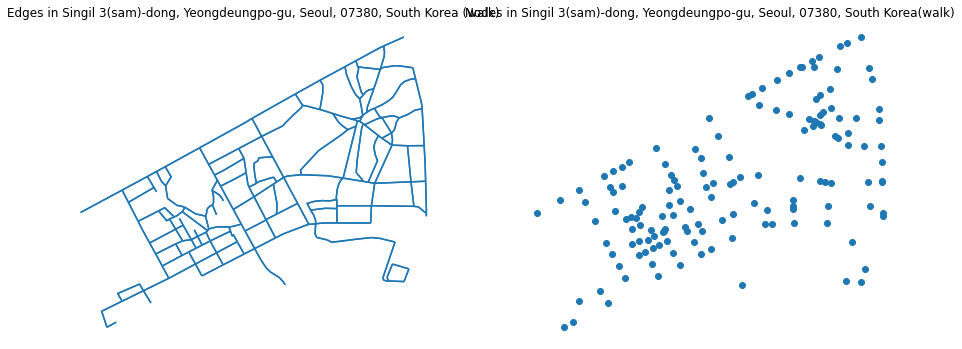

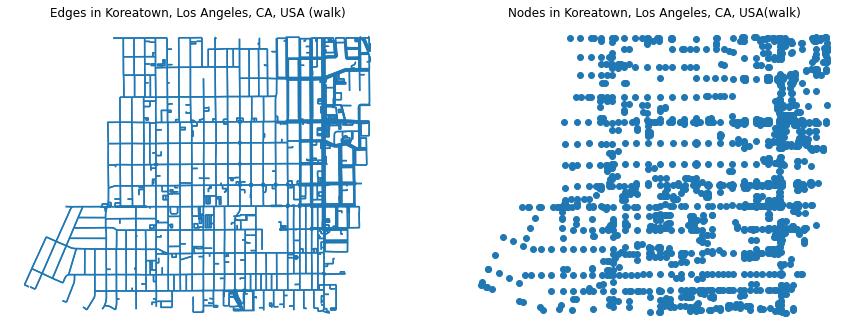

In [25]:
for index, row in place_df.iterrows():
    #name = place_df(row['Neighborhood Name']
    edge_node_map(row['Neighborhood Name'], 'walk')

Define function to take two places as parameters and return a side by side EDGE graph: 

In [42]:
def edge_node_map2 (place1, place2, networktype):    
    
    # download neighborhood street network
    neighborhood1 = ox.graph_from_place(place1, network_type = networktype)
    neighborhood2 = ox.graph_from_place(place2, network_type = networktype)
    
    # project downloaded network data to Web Mercator (measurements are in meters)
    neighborhood1 = ox.project_graph(neighborhood1, to_crs='epsg:3857') 
    neighborhood2 = ox.project_graph(neighborhood2, to_crs='epsg:3857')
    
    # convert nodes and edges to two separate geodataframes 
    neighborhood1_node, neighborhood1_edge = ox.graph_to_gdfs(neighborhood1) 
    neighborhood2_node, neighborhood2_edge = ox.graph_to_gdfs(neighborhood2) 
    
    # create the 1x2 subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 12))
    # name each subplot
    ax1, ax2 = axs
    # Edge map on the left
    neighborhood1_edge.plot(figsize =(10,10),
                      ax = ax1)  
    
    ax1.axis("off")
    ax1.set_title("Edges in "+ place1 + " (" +networktype + ")")

    # spatial lag map on the right
    neighborhood2_node.plot(figsize =(10,10),
                     ax = ax2) 

    ax2.axis("off")
    ax2.set_title("Edges in "+ place2 + "(" + networktype + ")")

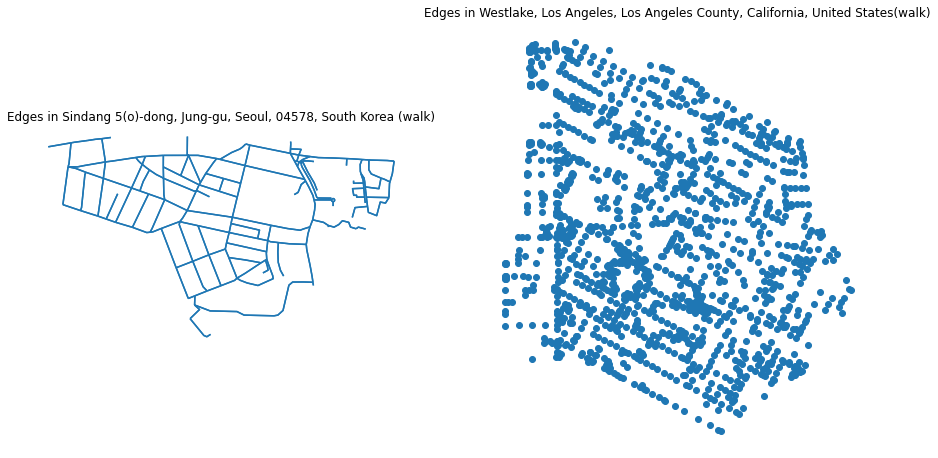

In [43]:
edge_node_map2(s_transit, l_transit, 'walk')

Side by side edge maps for each neighborhood pair: 

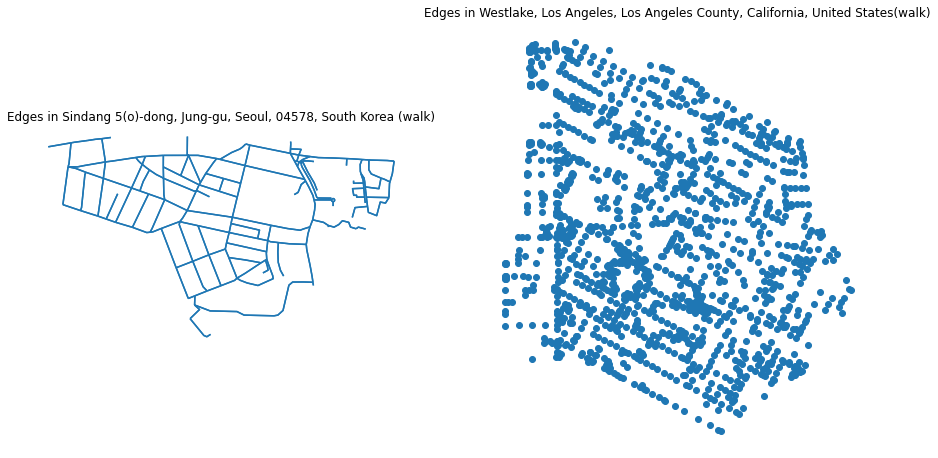

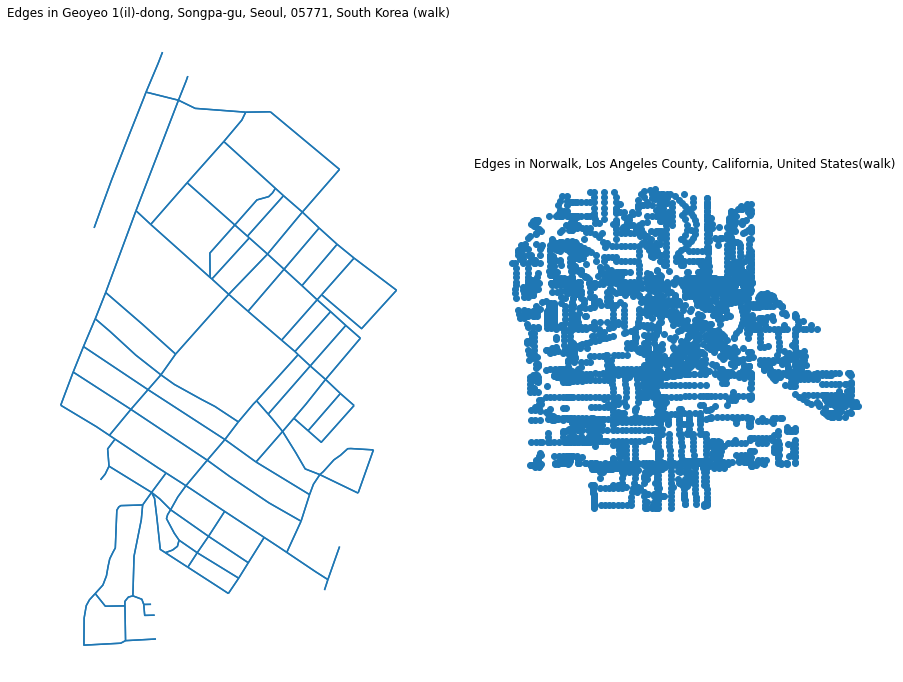

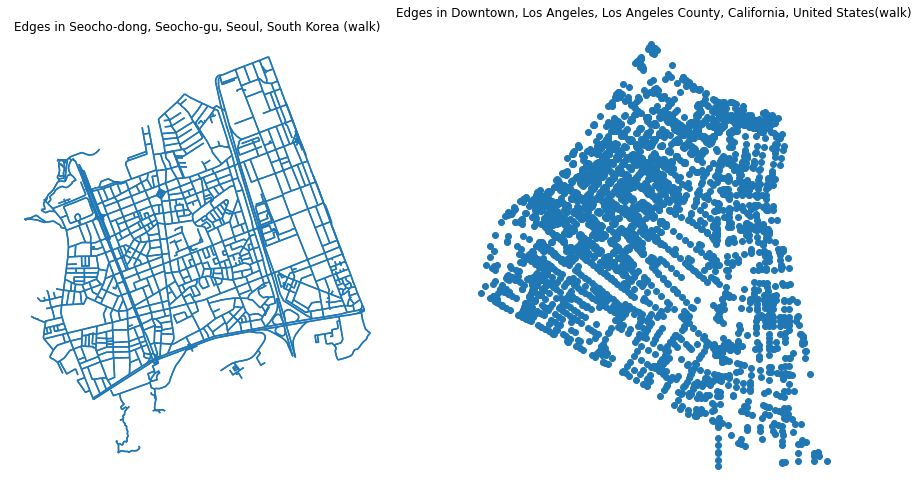

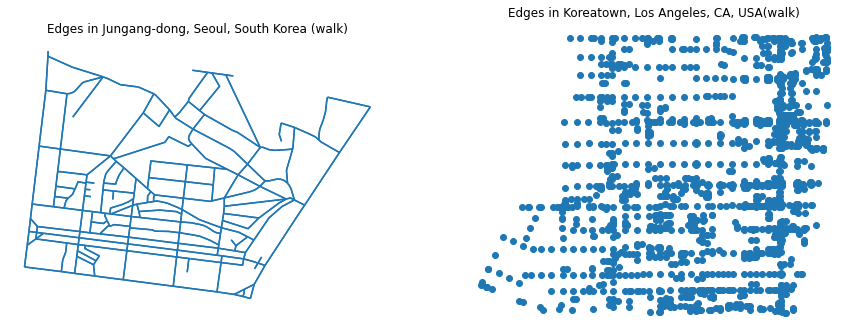

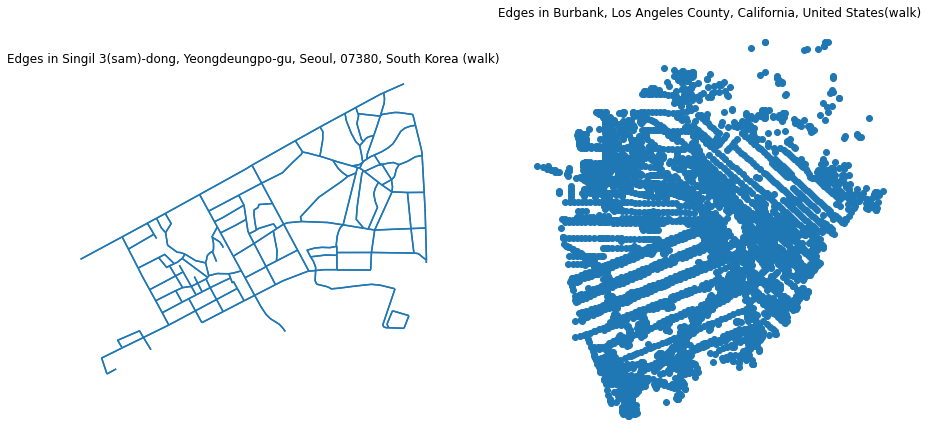

In [44]:
for index, row in place_df_2.iterrows():
    #name = place_df(row['Neighborhood Name']
    edge_node_map2(row['Seoul'], row['Los Angeles'], 'walk')

## Isochrone Mapping 

Now for the isochrone mapping! 

I will copy the Week 4 Lab to create isochrones of 5, 10, 15, and 20 min walkshed from the central node for each of our neighborhood pairs. 

1. Declare Central Node
2. Map Central Node 
3. Calculate Travel Cost 
4. Colors
5. Dissolve
6. Map it all
7. Make it better 

### Edge and Node maps with Central Node

Define function to map red central node, blue other nodes, and grey edges for each neighborhood - side by side. 

In [38]:
def isochrome1 (place1, place2, networktype):   
    print("Edges of "+ place1 + " and " + place2 +  " (" +networktype + ")")
    
    # download neighborhood street network
    neighborhood1 = ox.graph_from_place(place1, network_type = networktype)
    neighborhood2 = ox.graph_from_place(place2, network_type = networktype)
    
    # project downloaded network data to Web Mercator (measurements are in meters)
    neighborhood1 = ox.project_graph(neighborhood1, to_crs='epsg:3857') 
    neighborhood2 = ox.project_graph(neighborhood2, to_crs='epsg:3857')
    
    # convert nodes and edges to two separate geodataframes 
    neighborhood1_node, neighborhood1_edge = ox.graph_to_gdfs(neighborhood1) 
    neighborhood2_node, neighborhood2_edge = ox.graph_to_gdfs(neighborhood2) 
    
    # get the bounding box coordinates
    n1_minx, n1_miny, n1_maxx, n1_maxy = neighborhood1_node.geometry.total_bounds
    n2_minx, n2_miny, n2_maxx, n2_maxy = neighborhood2_node.geometry.total_bounds
    
    # calculate the centroid
    n1_centroid_x = (n1_maxx-n1_minx)/2 + n1_minx
    n1_centroid_y = (n1_maxy-n1_miny)/2 + n1_miny 

    n2_centroid_x = (n2_maxx-n2_minx)/2 + n2_minx
    n2_centroid_y = (n2_maxy-n2_miny)/2 + n2_miny 
    
    # use osmnx's get_nearest_node command to get the id for the nearest node
    n1_center_node = ox.get_nearest_node(neighborhood1, 
                                  (n1_centroid_y, n1_centroid_x), 
                                  method = 'euclidean') 

    n2_center_node = ox.get_nearest_node(neighborhood2, 
                                  (n2_centroid_y,n2_centroid_x), 
                                  method = 'euclidean') 

    # create the 1x2 subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 12))
    # name each subplot
    ax1, ax2 = axs
    
# Neighborhood 1 
    neighborhood1_edge.plot(ax = ax1,
                            linewidth = 0.5, 
                            edgecolor='gainsboro',
                            zorder=10
                            )  
    # add all nodes to ax
    neighborhood1_node.plot(ax=ax1, 
                   markersize=2, 
                   zorder=20)
    
    # add the center node in red also to ax
    neighborhood1_node.loc[[n1_center_node]].plot(ax = ax1,
                                      color='r', 
                                      zorder=30)
    
    ax1.axis("off")
    ax1.set_title("Edges in "+ place1 + " (" +networktype + ")")

# Neighborhood 2 

    # Edge map on the left
    neighborhood2_edge.plot(linewidth = 0.5, 
                            edgecolor='gainsboro',
                            zorder=10,
                            ax = ax2)  
    # add all nodes to ax
    neighborhood2_node.plot(ax=ax2, 
                   markersize=2, 
                   zorder=20)
    
    # add the center node in red also to ax
    neighborhood2_node.loc[[n2_center_node]].plot(ax=ax2,
                                      color='r', 
                                      zorder=30)

    ax2.axis("off")
    ax2.set_title("Edges in "+ place2 + "(" + networktype + ")")

Edges of Seocho-dong, Seocho-gu, Seoul, South Korea and Downtown, Los Angeles, Los Angeles County, California, United States (walk)


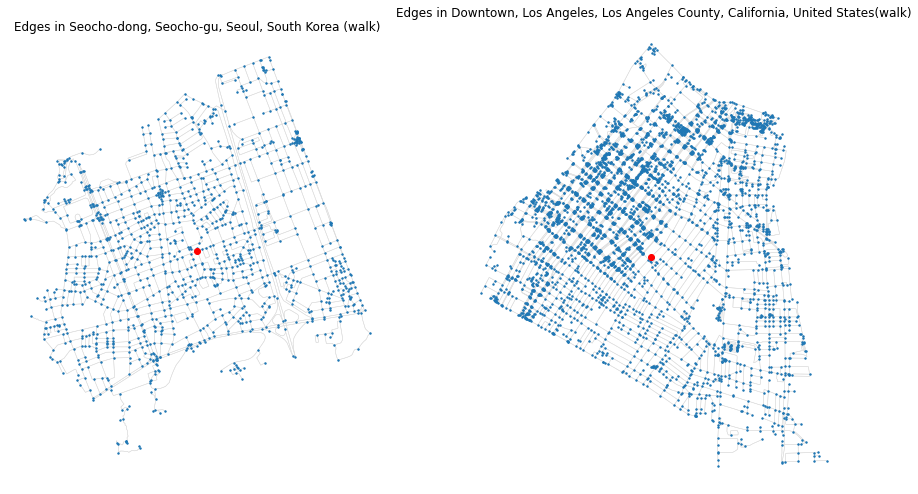

In [39]:
isochrome1(s_lrt, l_lrt, 'walk')

Edges of Sindang 5(o)-dong, Jung-gu, Seoul, 04578, South Korea and Westlake, Los Angeles, Los Angeles County, California, United States (walk)
Edges of Geoyeo 1(il)-dong, Songpa-gu, Seoul, 05771, South Korea and Norwalk, Los Angeles County, California, United States (walk)
Edges of Seocho-dong, Seocho-gu, Seoul, South Korea and Downtown, Los Angeles, Los Angeles County, California, United States (walk)
Edges of Jungang-dong, Seoul, South Korea and Koreatown, Los Angeles, CA, USA (walk)
Edges of Singil 3(sam)-dong, Yeongdeungpo-gu, Seoul, 07380, South Korea and Burbank, Los Angeles County, California, United States (walk)


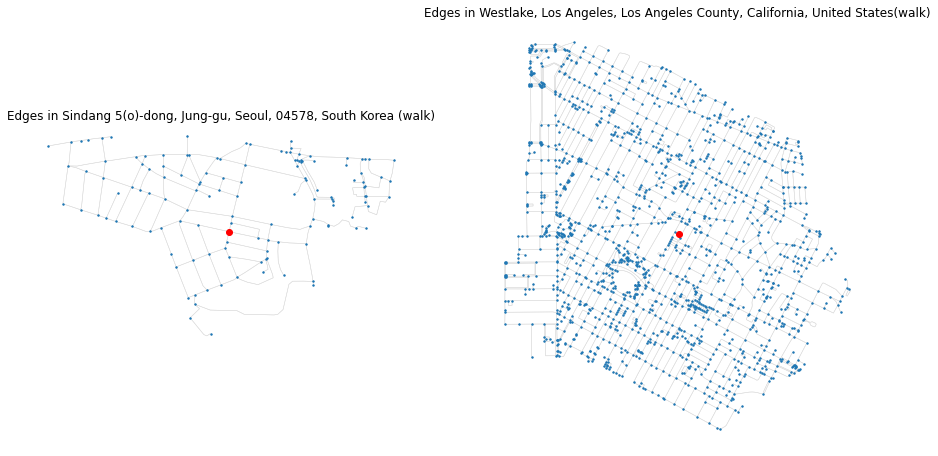

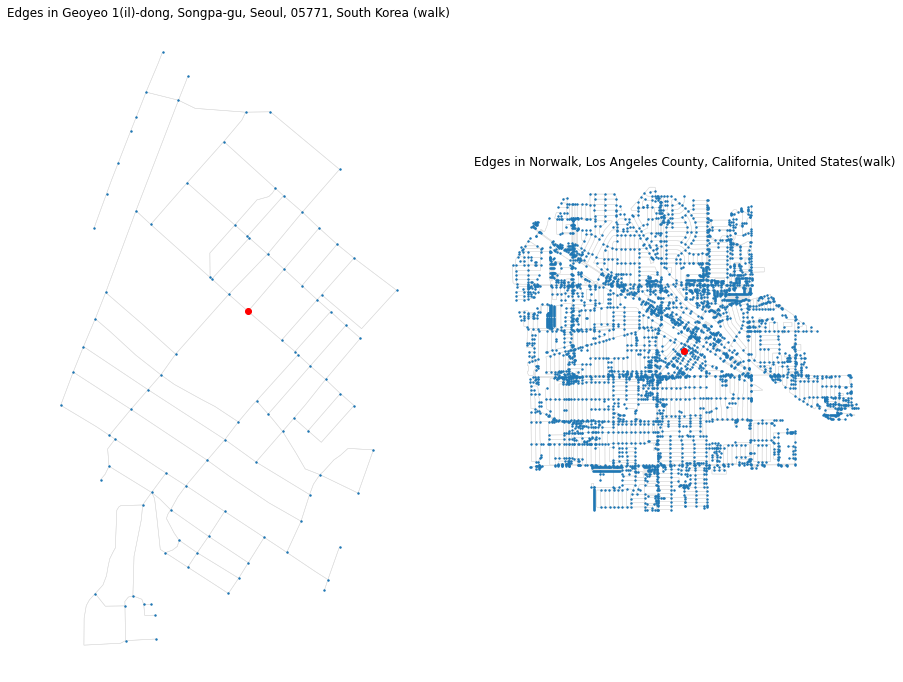

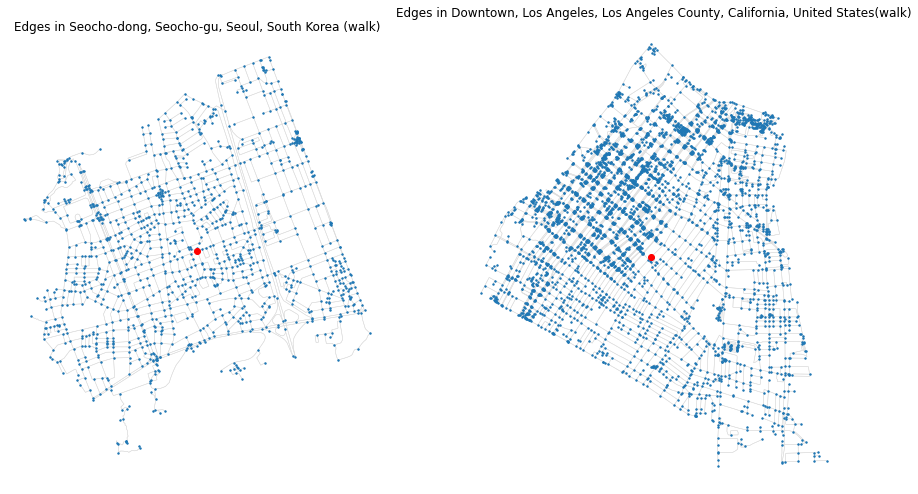

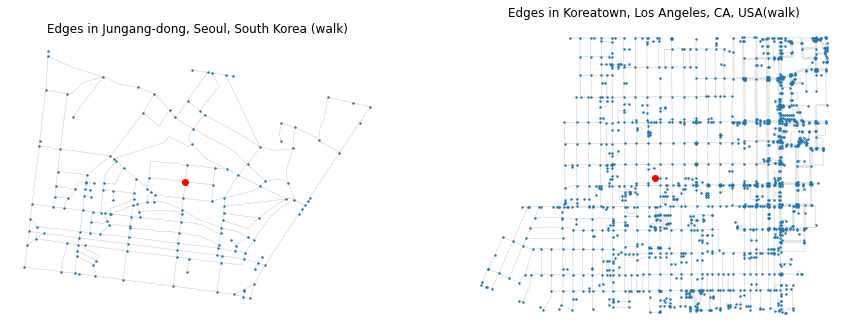

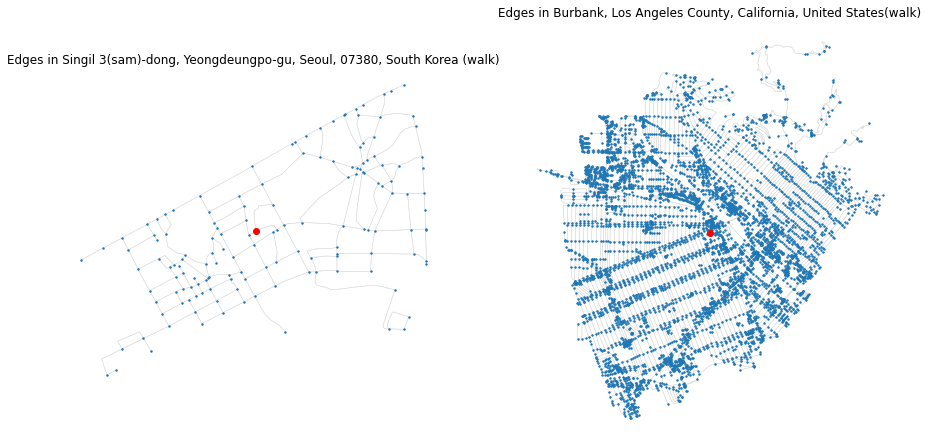

In [45]:
for index, row in place_df_2.iterrows():
    #name = place_df(row['Neighborhood Name']
    isochrome1(row['Seoul'], row['Los Angeles'], 'walk')

## Next Steps / Unresolved ;_; 

I know the assignment was to clean the notebooks, which is ^everything up to this point. 
I just wanted to note the problems / questions I had here. 

##### Multiple Subplots

I want to  to create a nice subplot that shows the street grid maps in a 5x2 grid. 

Can I use the 6 x 3 place_gdf_2 dataframe to preserve the pairs? 

I can think of 2 ways to go about this: 
1. Use the streetgrid function I defined above and have a for loop iterate through my place_df_2 dataframe. 
2. Create a function that generates side by side street maps, and iterate through a gdf with a Seoul and LA column. The function would take in the Seoul and LA neighborhoods in each row of the gdf as parameters. 
 

|       Neighborhood Pair      |             Seoul            |      Los Angeles     |
|:----------------------------:|:----------------------------:|:--------------------:|
| Highest % Commute by Transit |        Sindang 5-dong        |       Westlake       |
| Highest % Commute by Vehicle |         Geoyeo 1-dong        |        Norwalk       |
|    Highest Rail Ridership    |          Seocho-dong         |         DTLA         |
|  Highest Population Density  | Sadang 4-dong / Jungang-dong | Westlake / Koreatown |
|      Highest Job Density     |         Singil 3-dong        |    DTLA / Burbank    |

And then iterating through the dataframe in a for loop? 

My ultimate goal is to write functions for generating the following: 
* One 5x2 map displaying street grids of all 5 neighborhood pairs 
* Five 2x3 maps displaying walk, public transport, and drive isochrones for both neighborhoods in each pair   

Research:

* Iterating over a df: https://www.geeksforgeeks.org/iterating-over-rows-and-columns-in-pandas-dataframe/ 
 
* Subplot documentation: https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots 

* Stacking subplots in multiple directions: https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html

* Less clean method of creating subplots?: 
Source: https://stackoverflow.com/questions/23658013/using-matplotlib-show-10-subplots-all-at-once 

* For loop to draw the maps?: 
Source: https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib

* Creating empty df and filling it: https://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-then-filling-it

* .map() : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html

##### Side by Side Street Grids

Define a function that takes 2 places and network type as parameter, and creates side by side subplot of street grid map: 

In [20]:
def streetgrid_pair (place1, place2, networktype):   
    # download neighborhood street network
    neighborhood1 = ox.graph_from_place(place1, network_type = networktype)
    neighborhood2 = ox.graph_from_place(place2, network_type = networktype) 
    
    # project downloaded network data to Web Mercator (measurements are in meters)
    neighborhood1 = ox.project_graph(neighborhood1, to_crs='epsg:3857') 
    neighborhood2 = ox.project_graph(neighborhood2, to_crs='epsg:3857')  
    
    # create the 1x2 subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 12)) 
    ax1, ax2 = axs
    
    # Left
    ##neighborhood1.plot(figsize =(10,10),
    ##                  ax = ax1) 
    ox.plot_graph(neighborhood1, 
                  ax = ax1)
    
    ax1.axis("off")
    ax1.set_title("Street Grid of "+ place1 + " (network type: " + networktype + ")")

    # Right
    
    ##neighborhood2.plot(figsize =(10,10),
    ##                 ax = ax2) 
    ox.plot_graph(neighborhood2, 
                  ax = ax2)
    
    ax2.axis("off")
    ax2.set_title("Street Grid of "+ place2 + " (network type: " + networktype + ")")

Test the function with the transit-oriented neighborhood pair (highest % commute by transit):

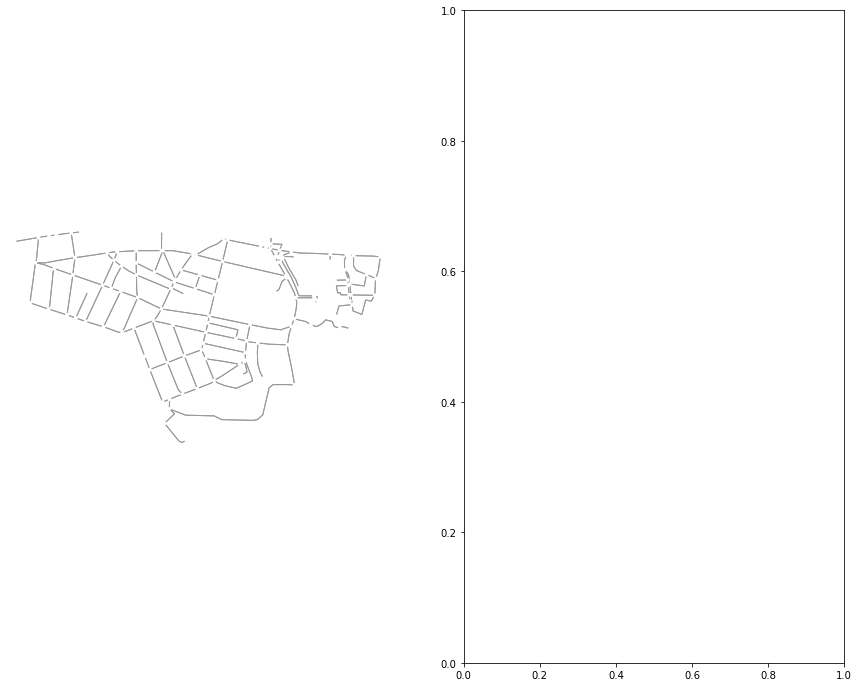

<Figure size 432x288 with 0 Axes>

In [21]:
streetgrid_pair(s_transit, l_transit, 'walk')

Okay ^ didn't work, but if it did, I would then iterate through place_df_2 to plot side by side street grids of each neighborhood pair using the following code: 

    for key, value in place_df_2.iteritems(): 
        streetgrid_pair(row['Seoul'], row['Los Angeles'], 'walk')


##### Printing node and edge gdfs through for loop

In [49]:
for index, row in place_df.iterrows():
    #name = place_df(row['Neighborhood Name']
    edge_node_gdf(row['Neighborhood Name'], 'walk')
 

Nodes in Sindang 5(o)-dong, Jung-gu, Seoul, 04578, South Korea (network type: walk)
Nodes in Westlake, Los Angeles, Los Angeles County, California, United States (network type: walk)
Nodes in Geoyeo 1(il)-dong, Songpa-gu, Seoul, 05771, South Korea (network type: walk)
Nodes in Norwalk, Los Angeles County, California, United States (network type: walk)
Nodes in Seocho-dong, Seocho-gu, Seoul, South Korea (network type: walk)
Nodes in Downtown, Los Angeles, Los Angeles County, California, United States (network type: walk)
Nodes in Jungang-dong, Seoul, South Korea (network type: walk)
Nodes in Koreatown, Los Angeles, CA, USA (network type: walk)
Nodes in Singil 3(sam)-dong, Yeongdeungpo-gu, Seoul, 07380, South Korea (network type: walk)
Nodes in Koreatown, Los Angeles, CA, USA (network type: walk)


QUESTION: 

1. I don't know how to print the title on top of the respective dataframe.. I tried inserting the neighborhood_node.head() into the print() command but unfortunately it didn't return anything. 

2. How do I make the function save the edge and node gdfs into new variables as it iterates through a function? 

For now, I'll define a neighborhood pair analysis function that takes in 2 places. That way I can have the function also generate 1x2 subplots. 


##### Isochromes Next Steps

Lol is there way to simplify the process for creating isochromes? Maybe a nested for loop?  Multiple functions within one for loop? 

Source: https://blog.simpliv.com/python-loops-and-functions-complete-guide-with-examples/